In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
import pandas as pd
import glob, os
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

tslearn 미설치시 : pip install tslearn

# DTW 알고리즘 군집화
- 여러 개의 행정동 중에서 음식물 쓰레기 배출량 패턴이 유사한 행정동 찾기
- 연속적인 시계열 데이터 군집화 시에 조금 더 적절한 알고리즘임

In [60]:
평가데이터1 = pd.read_csv("평가데이터1.csv").set_index("일자").iloc[:600,:]

In [62]:
평가데이터1.head(3)
# 여러개의 행정동이 column으로 구성된 배출량 데이터

,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,삼도1동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
일자,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1708250.0,1239600,9357900,1717700,1264950,1765600,613300,4165050,395300,2556750,...,625550.0,718950.0,6478450,1025900,1699100,1384300,1133000,452850,4728700,444650
2018-01-02,1841150.0,1569850,10152950,2121750,1278200,2148050,748400,4361400,356300,2724050,...,801050.0,678450.0,6574000,967650,1847400,1794650,1268450,366050,4374000,822950
2018-01-03,1411450.0,1405650,8899800,1920300,1284450,2061650,538000,4028450,300400,2333350,...,498400.0,657850.0,5490000,921250,1577550,1799100,1242400,511600,3691250,577200


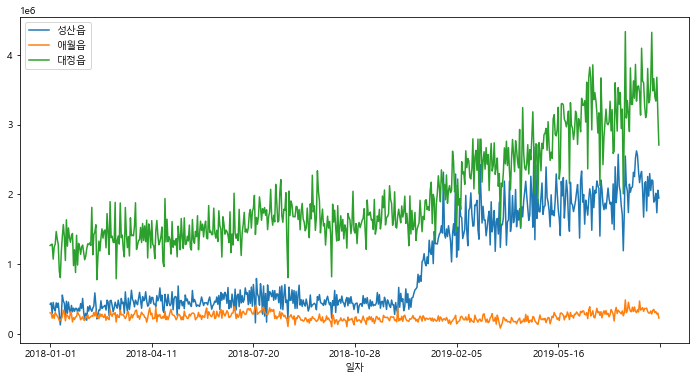

In [63]:
# 2018년 1월부터 2021년 4월까지의 배출량 데이터 시각화해보기
fig,ax = plt.subplots(1,1,figsize=(12,6))
평가데이터1["성산읍"].plot(ax=ax)
평가데이터1["애월읍"].plot(ax=ax)
평가데이터1["대정읍"].plot(ax=ax)
plt.legend()

In [64]:
평가데이터1.head(2)

,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,삼도1동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
일자,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1708250.0,1239600,9357900,1717700,1264950,1765600,613300,4165050,395300,2556750,...,625550.0,718950.0,6478450,1025900,1699100,1384300,1133000,452850,4728700,444650
2018-01-02,1841150.0,1569850,10152950,2121750,1278200,2148050,748400,4361400,356300,2724050,...,801050.0,678450.0,6574000,967650,1847400,1794650,1268450,366050,4374000,822950


In [65]:
def make_3dim_array(X1):
    X1_df = X1.copy()
    res = []
    for i in X1_df.columns:
        res.append(pd.concat([X1_df[i]],axis=1))
        
    # 건입동 - 남원읍 - 노형동 - 대륜동... 데이터프레임을 각각 하나의 요소로 바라본 뒤에 3차원으로 결합하기
    return np.stack(res)

In [66]:
# 행정동별 배출량 데이터프레임 2차원 -> 행정동별 배출량 데이터프레임 3차원
평가데이터1_3dim = make_3dim_array(평가데이터1)

In [67]:
평가데이터1_3dim.shape
# 37개의 행정동, 1277일, 배출량 데이터로 구성된 3차원 데이터

(37, 600, 1)

In [68]:
평가데이터1_3dim[0]
# 건입동 배출량

array([[1708250.],
       [1841150.],
       [1411450.],
       [1558700.],
       [1338350.],
       [1667900.],
       [1568000.],
       [1368900.],
       [1545400.],
       [1154300.],
       [ 938650.],
       [1414050.],
       [1797900.],
       [1887100.],
       [1703150.],
       [1172600.],
       [1696550.],
       [1516300.],
       [1585550.],
       [1463150.],
       [1716900.],
       [1586400.],
       [1298850.],
       [1138150.],
       [1103000.],
       [1415400.],
       [1593750.],
       [1454700.],
       [1230650.],
       [1397550.],
       [1373800.],
       [1487100.],
       [1357300.],
       [1007500.],
       [ 986150.],
       [1259600.],
       [ 959450.],
       [1501900.],
       [1574850.],
       [1687800.],
       [1364500.],
       [1416000.],
       [1438750.],
       [1844550.],
       [1966900.],
       [2493350.],
       [1499250.],
       [1731000.],
       [1690000.],
       [1713150.],
       [1668500.],
       [1364600.],
       [1452

In [69]:
def elbow_dtw(data):
    SSE = []
    for i in range(1,11):
        model_elec = TimeSeriesKMeans(n_clusters=i,metric='dtw',max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
        model_elec.fit(data)
        SSE.append(np.round(model_elec.inertia_,3))

    plt.plot(range(1,11),SSE,marker="o",label="DTW",color="darkorange")
    plt.legend(loc="upper right")
    plt.title("DTW find best Cluster")
    plt.show()

DTW 알고리즘도 SSE 계산해서 최적의 군집 개수 판단하기
- metric 부분이 DTW로 DTW 알고리즘 이용

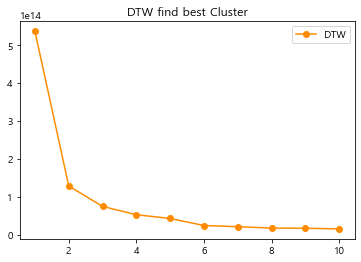

In [70]:
# 3개 혹은 4개가 최적의 군집 개수가 보여짐
elbow_dtw(평가데이터1_3dim)

실루엣 계수 계산하기
- model에 군집 개수 3,4개 일 때의 군집화 모델
- result에 군집 개수 3,4개 일 때의 군집화 결과

In [71]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
model = []
result = []

for i in range(3,5):
    cluster_model = TimeSeriesKMeans(n_clusters=i,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    
    # 군집화 모델
    model.append(cluster_model)
    
    # 군집화 결과
    cluster_result = cluster_model.fit_predict(평가데이터1_3dim)
    result.append(cluster_result)

    print("군집개수 : ",i,"개 실루엣점수 = ",silhouette_score(평가데이터1_3dim, cluster_result, metric="dtw"))

군집개수 :  3 개 실루엣점수 =  0.641609254851657
군집개수 :  4 개 실루엣점수 =  0.5794433873515856


### DTW 이용한 군집화
- 군집개수 :  3 개 실루엣점수 =  0.641609254851657
- 군집개수 :  4 개 실루엣점수 =  0.5794433873515856
- 3개의 군집으로 군집화하기

In [72]:
# 군집 4개 일 때 모델
clutser_model = model[1]

In [76]:
# 군집 4개 일 때 결과
result[1]

array([0, 0, 1, 0, 0, 0, 3, 2, 3, 0, 0, 2, 0, 0, 3, 2, 3, 3, 1, 3, 3, 0,
       2, 0, 0, 0, 1, 3, 3, 1, 3, 0, 0, 3, 3, 2, 3], dtype=int64)

In [81]:
cluster_df = pd.DataFrame(index=평가데이터1.columns,columns=["label"])
cluster_df["label"] = result[1]

In [82]:
cluster_df

,label
건입동,0
남원읍,0
노형동,1
대륜동,0
대정읍,0
대천동,0
도두동,3
동홍동,2
봉개동,3
삼도1동,0


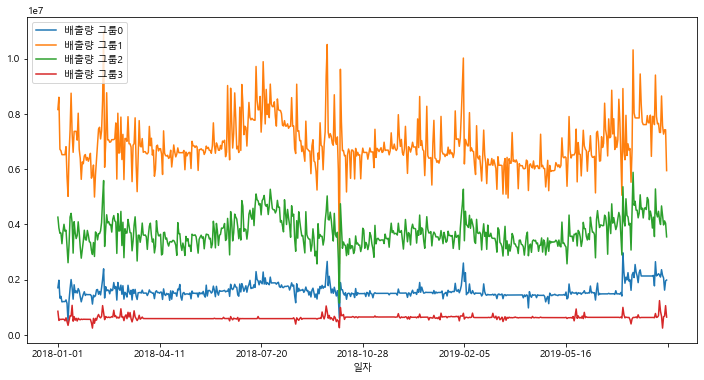

In [73]:
# 4개 군집의 중심점 시각화 해보기
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(4):
    df = pd.DataFrame(index = 평가데이터1.index,columns=["배출량"],
                      data = clutser_model.cluster_centers_[i])
    
    # 군집 중심점으로 그래프 그리기
    (df.iloc[:,0]).plot(ax = ax,label="배출량 그룹" +str(i))
    ax.legend()

군집 각각 시각화

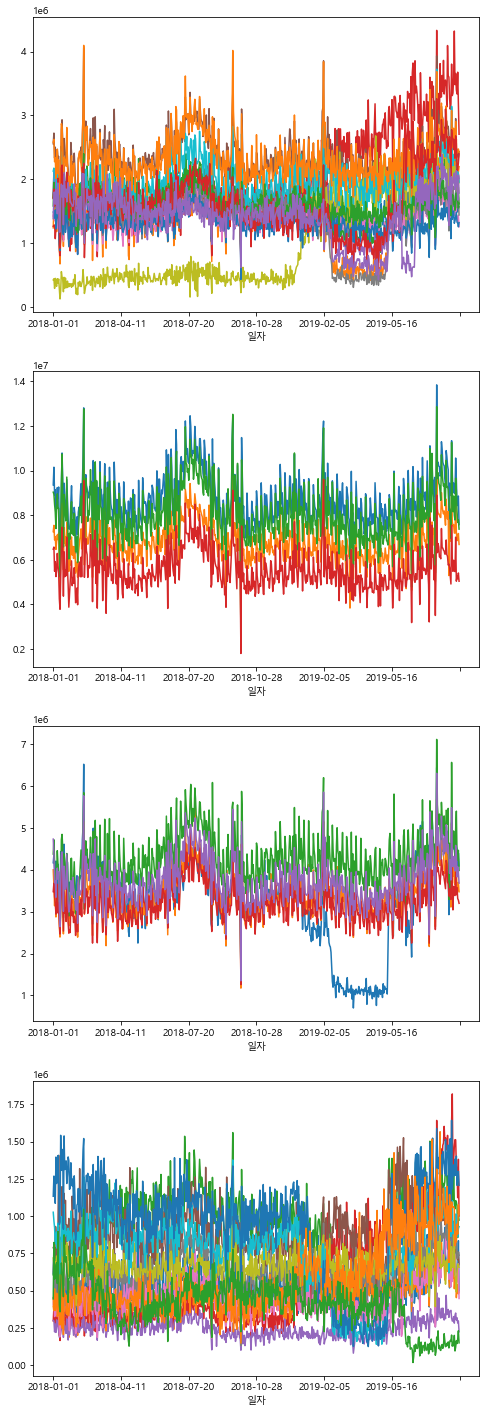

In [85]:
fig,ax = plt.subplots(4,1,figsize=(8,25))
for j in range(4):
    
    # 군집 0번부터 3번까지
    for i in cluster_df[cluster_df['label'] == j].index:
        
        평가데이터1[i].plot(ax=ax[j])